### Analyzing Los Angeles Crime Data

Los Angeles is an enormous area comprised of over 80 different cities. Los Angeles is located in the state of California and is one of the biggest tourist destinations in the US. Although, Los Angeles is one of the most visited places in the US the primary question is how safe is Los Angeles? Some may be aware that Los Angeles may have a high crime rate and various areas are unsafe.

In [27]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sb


import os
print('Packages imported')

Packages imported


### Dataset Information

In this project I will be using 5 and half years worth of data. This dataset contains over 60,000 rows and 29 columns. I retrieved this dataset from data.lacity (https://data.lacity.org/A-Safe-City/Crime-Data-from-2020-to-Present/2nrs-mtv8).

Dataset Attributes:

DR_NO : Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits            
Date Rptd: MM/DD/YYYY        
DATE OCC : MM/DD/YYYY          
TIME OCC : In 24 hour military time.         
AREA : The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.             
AREA NAME : The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles.       
Rpt Dist No : A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons.      
Part 1-2 :         
Crm Cd : Indicates the crime committed. (Same as Crime Code 1)             
Crm Cd Desc : Defines the Crime Code provided.       
Mocodes : Modus Operandi: Activities associated with the suspect in commission of the crime           
Vict Age : Two character numeric           
Vict Sex : F - Female M - Male X - Unknown          
Vict Descent : Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian      
Premis Cd  : The type of structure, vehicle, or location where the crime took place.       
Premis Desc : Defines the Premise Code provided.       
Weapon Used Cd : The type of weapon used in the crime.   
Weapon Desc : Defines the Weapon Used Code provided.      
Status : Status of the case. (IC is the default)             
Status Desc : Defines the Status Code provided.      
Crm Cd 1 : Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious.          
Crm Cd 2  : May contain a code for an additional crime, less serious than Crime Code 1.        
Crm Cd 3  : May contain a code for an additional crime, less serious than Crime Code 1.        
Crm Cd 4  : May contain a code for an additional crime, less serious than Crime Code 1.       
LOCATION  : Street address of crime incident rounded to the nearest hundred block to maintain anonymity           
Cross Street : Cross Street of rounded Address      
LAT : Latitude              
LON : Longtitude            

In [28]:
la = pd.read_csv('./Los Angeles crime data/Crime_Data_from_2015_to_2020.csv')
'''
files = [file for file in os.listdir('./Los Angeles crime data')]

#cy stands for crime years.
cy = pd.DataFrame()

#Combining all files into one.
for file in files:

    LA = pd.read_csv('./Los Angeles crime data/'+file)
    cy = pd.concat([cy,LA])
cy.to_csv("all_crimes.csv", index=False)
'''
print("data imported")

data imported


In [29]:
la.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,150304043,1/1/2015 0:00,3/1/2011 0:00,1600,3,Southwest,356,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,...,IC,Invest Cont,812,860.0,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
1,151504009,1/1/2015 0:00,2/22/2013 0:00,1625,15,N Hollywood,1555,2,956,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",...,IC,Invest Cont,956,NaN,NaN,NaN,5000 FAIR AV,NaN,34.1613,-118.3747
2,150404002,1/1/2015 0:00,12/31/2014 0:00,2230,4,Hollenbeck,429,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510,NaN,NaN,NaN,5300 POPLAR BL,NaN,34.0905,-118.1647
3,152104033,1/1/2015 0:00,12/13/2014 0:00,1300,21,Topanga,2158,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,IC,Invest Cont,440,NaN,NaN,NaN,6500 CANOGA AV,NaN,34.1884,-118.5975
4,150504026,1/1/2015 0:00,12/17/2014 0:00,1500,5,Harbor,512,2,956,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",...,IC,Invest Cont,956,NaN,NaN,NaN,1300 W 264TH ST,NaN,33.7820,-118.3003


In [30]:
la.isnull().sum()

DR_NO                 0
Date Rptd             0
DATE OCC              0
TIME OCC              0
AREA                  0
AREA NAME             0
Rpt Dist No           0
Part 1-2              0
Crm Cd                0
Crm Cd Desc           0
Mocodes            6202
Vict Age              0
Vict Sex           4986
Vict Descent       4988
Premis Cd             2
Premis Desc           2
Weapon Used Cd    43062
Weapon Desc       43062
Status                0
Status Desc           0
Crm Cd 1              0
Crm Cd 2          58023
Crm Cd 3          62799
Crm Cd 4          62955
LOCATION              0
Cross Street      54260
LAT                   0
LON                   0
dtype: int64

In [31]:
la.drop(['Crm Cd 4'], axis = 1, inplace=True)

In [32]:
la.fillna({'Weapon Used Cd':'NWU','Weapon Desc':'ND'},inplace=True)

As you can see there are many values missing, so based on the code I dropped the column Crm Cd 4 since there were no entries. For columns Weapon Used Cd and Weapon Desc I filled with NWU and ND. Which mean 'No Weapons used' and 'No description'(respectively). 

In [33]:
la.isnull().sum()

DR_NO                 0
Date Rptd             0
DATE OCC              0
TIME OCC              0
AREA                  0
AREA NAME             0
Rpt Dist No           0
Part 1-2              0
Crm Cd                0
Crm Cd Desc           0
Mocodes            6202
Vict Age              0
Vict Sex           4986
Vict Descent       4988
Premis Cd             2
Premis Desc           2
Weapon Used Cd        0
Weapon Desc           0
Status                0
Status Desc           0
Crm Cd 1              0
Crm Cd 2          58023
Crm Cd 3          62799
LOCATION              0
Cross Street      54260
LAT                   0
LON                   0
dtype: int64

In [34]:
la.shape

(62959, 27)

In [35]:
la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62959 entries, 0 to 62958
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DR_NO           62959 non-null  int64  
 1   Date Rptd       62959 non-null  object 
 2   DATE OCC        62959 non-null  object 
 3   TIME OCC        62959 non-null  int64  
 4   AREA            62959 non-null  int64  
 5   AREA NAME       62959 non-null  object 
 6   Rpt Dist No     62959 non-null  int64  
 7   Part 1-2        62959 non-null  int64  
 8   Crm Cd          62959 non-null  int64  
 9   Crm Cd Desc     62959 non-null  object 
 10  Mocodes         56757 non-null  object 
 11  Vict Age        62959 non-null  int64  
 12  Vict Sex        57973 non-null  object 
 13  Vict Descent    57971 non-null  object 
 14  Premis Cd       62957 non-null  float64
 15  Premis Desc     62957 non-null  object 
 16  Weapon Used Cd  62959 non-null  object 
 17  Weapon Desc     62959 non-null 

In [36]:
#Converted Date columns from object to date datatype.
la['Date Rptd']= pd.to_datetime(la['Date Rptd'])
la['DATE OCC'] = pd.to_datetime(la['DATE OCC'])
la.dtypes.reset_index()

,index,0
0,DR_NO,int64
1,Date Rptd,datetime64[ns]
2,DATE OCC,datetime64[ns]
3,TIME OCC,int64
4,AREA,int64
5,AREA NAME,object
6,Rpt Dist No,int64
7,Part 1-2,int64
8,Crm Cd,int64
9,Crm Cd Desc,object


In [37]:
#Added month, day, and hour column.
la['Hour'] = la['Date Rptd'].apply(lambda time: time.hour)
la['Month'] = la['Date Rptd'].apply(lambda time: time.month)
la['Day'] = la['Date Rptd'].apply(lambda time: time.dayofweek)
la

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,LOCATION,Cross Street,LAT,LON,Hour,Month,Day
0,150304043,2015-01-01,2011-03-01,1600,3,Southwest,356,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,...,812,860.0,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,0,1,3
1,151504009,2015-01-01,2013-02-22,1625,15,N Hollywood,1555,2,956,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",...,956,NaN,NaN,5000 FAIR AV,NaN,34.1613,-118.3747,0,1,3
2,150404002,2015-01-01,2014-12-31,2230,4,Hollenbeck,429,1,510,VEHICLE - STOLEN,...,510,NaN,NaN,5300 POPLAR BL,NaN,34.0905,-118.1647,0,1,3
3,152104033,2015-01-01,2014-12-13,1300,21,Topanga,2158,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,440,NaN,NaN,6500 CANOGA AV,NaN,34.1884,-118.5975,0,1,3
4,150504026,2015-01-01,2014-12-17,1500,5,Harbor,512,2,956,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",...,956,NaN,NaN,1300 W 264TH ST,NaN,33.7820,-118.3003,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62954,200612163,2020-07-04,2010-07-02,1545,6,Hollywood,663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,740,NaN,NaN,7000 SANTA MONICA BL,NaN,34.0907,-118.3421,0,7,5
62955,201813556,2020-07-05,2010-12-01,1800,18,Southeast,1826,1,235,CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT,...,235,NaN,NaN,1500 E 96TH ST,NaN,33.9490,-118.2477,0,7,6
62956,201512242,2020-07-05,2014-01-01,1,15,N Hollywood,1539,2,860,BATTERY WITH SEXUAL CONTACT,...,860,NaN,NaN,5600 SATSUMA AV,NaN,0.0000,0.0000,0,7,6
62957,201413292,2020-07-05,2015-06-08,1100,14,Pacific,1497,1,310,BURGLARY,...,310,NaN,NaN,5500 W CENTURY BL,NaN,33.9453,-118.3769,0,7,6


In [38]:
#Dataframe Statistics.
la.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,LAT,LON,Hour,Month,Day
count,6.295900e+04,62959.000000,62959.000000,62959.000000,62959.000000,62959.000000,62959.000000,62957.000000,62959.000000,4936.000000,160.000000,62959.000000,62959.000000,62959.0,62959.000000,62959.000000
mean,1.536539e+08,1291.418145,11.141155,1160.442558,1.500834,504.031131,32.257151,339.203425,503.826173,907.256888,962.793750,34.045023,-118.235772,0.0,6.193840,2.762957
std,8.113818e+06,652.569404,6.027440,602.801078,0.500003,212.866565,20.887492,206.861732,212.642365,129.466617,91.473754,1.117354,3.860618,0.0,3.494879,1.928757
min,8.090000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-9.000000,101.000000,110.000000,210.000000,521.000000,0.000000,-118.666500,0.0,1.000000,0.000000
25%,1.507048e+08,900.000000,6.000000,643.000000,1.000000,341.000000,19.000000,108.000000,341.000000,821.000000,998.000000,34.012600,-118.439400,0.0,3.000000,1.000000
50%,1.513007e+08,1300.000000,12.000000,1203.000000,2.000000,440.000000,32.000000,406.000000,440.000000,998.000000,998.000000,34.064400,-118.333700,0.0,6.000000,3.000000
75%,1.518224e+08,1820.000000,16.000000,1681.000000,2.000000,649.000000,47.000000,501.000000,649.000000,998.000000,998.000000,34.181100,-118.278850,0.0,9.000000,4.000000
max,2.021106e+08,2359.000000,21.000000,2198.000000,2.000000,956.000000,99.000000,903.000000,956.000000,999.000000,999.000000,34.596700,0.000000,0.0,12.000000,6.000000


In [39]:
#Designed a table showing the value count of crime in each area.
t = la['AREA NAME'].value_counts()

table = pd.DataFrame(data=t.values, index=t.index, columns=['Count'])
table = table.reindex(['77th Street','Southwest','N Hollywood','Mission','Pacific','Van Nuys','Southeast','Devonshire','Topanga',
                       'Northeast','Olympic','Central','West LA','Hollywood','Harbor','West Valley','Rampart',
                       'Newton','Wilshire','Foothill','Hollenbeck'])

table = table.reset_index()
table.rename({'index': 'Area Names'}, axis='columns', inplace = True)

table

,Area Names,Count
0,77th Street,4267
1,Southwest,4111
2,N Hollywood,3565
3,Mission,3368
4,Pacific,3344
5,Van Nuys,3119
6,Southeast,3081
7,Devonshire,2996
8,Topanga,2916
9,Northeast,2904


In [40]:
#Top ten crimes in Los Angeles.
la['Crm Cd Desc'].value_counts(sort=True).head(10)

THEFT OF IDENTITY                                          8417
BATTERY - SIMPLE ASSAULT                                   4332
THEFT PLAIN - PETTY ($950 & UNDER)                         4052
VEHICLE - STOLEN                                           3934
BURGLARY                                                   3903
BURGLARY FROM VEHICLE                                      3474
INTIMATE PARTNER - SIMPLE ASSAULT                          3125
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    2868
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            2501
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             2467
Name: Crm Cd Desc, dtype: int64

In [41]:
la["Date Rptd"] = pd.to_datetime(la["Date Rptd"])
la["Date Rptd"]

0       2015-01-01
1       2015-01-01
2       2015-01-01
3       2015-01-01
4       2015-01-01
           ...    
62954   2020-07-04
62955   2020-07-05
62956   2020-07-05
62957   2020-07-05
62958   2020-07-06
Name: Date Rptd, Length: 62959, dtype: datetime64[ns]

In [42]:
#Created a 'year' column
la["Date Rptd"].dt.year

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
62954    2020
62955    2020
62956    2020
62957    2020
62958    2020
Name: Date Rptd, Length: 62959, dtype: int64

In [43]:
#Added a year Column
la["year"] = la["Date Rptd"].dt.year


In [53]:
#Number of crimes reported in each year. 
la['year'].value_counts(sort=True)

2015    55356
2016     3531
2017     1606
2018     1179
2019      951
2020      336
Name: year, dtype: int64

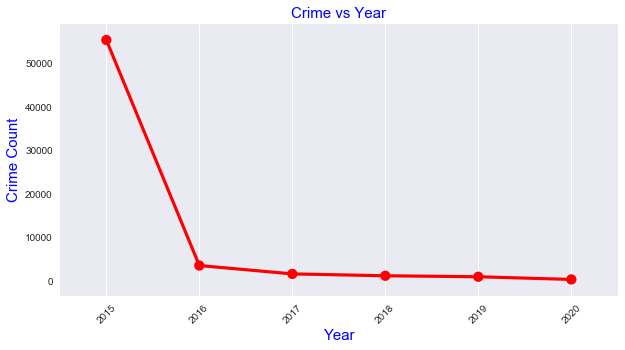

In [45]:
year_count = []

for i in la.year.unique():
    year_count.append(len(la[la['year']==i]))

plt.figure(figsize=(10,5))
sb.pointplot(x=la.year.unique(),y=year_count,color='red',alpha=0.8)
plt.xlabel('Year',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Crime Count',fontsize = 15,color='blue')
plt.title('Crime vs Year',fontsize = 15,color='blue')
plt.grid()
plt.show()

The graph shows a decline in crime from the years 2015 to the middle of 2020.

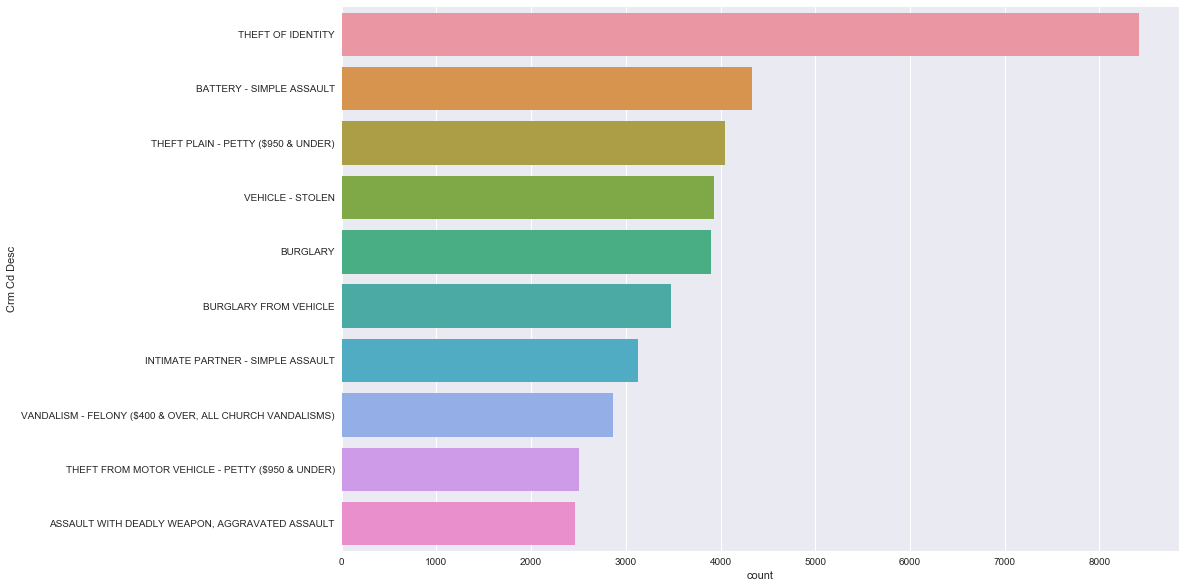

In [46]:
plt.figure(figsize = (15, 10))
sb.countplot(y= 'Crm Cd Desc', data = la, order = la['Crm Cd Desc'].value_counts().iloc[:10].index)


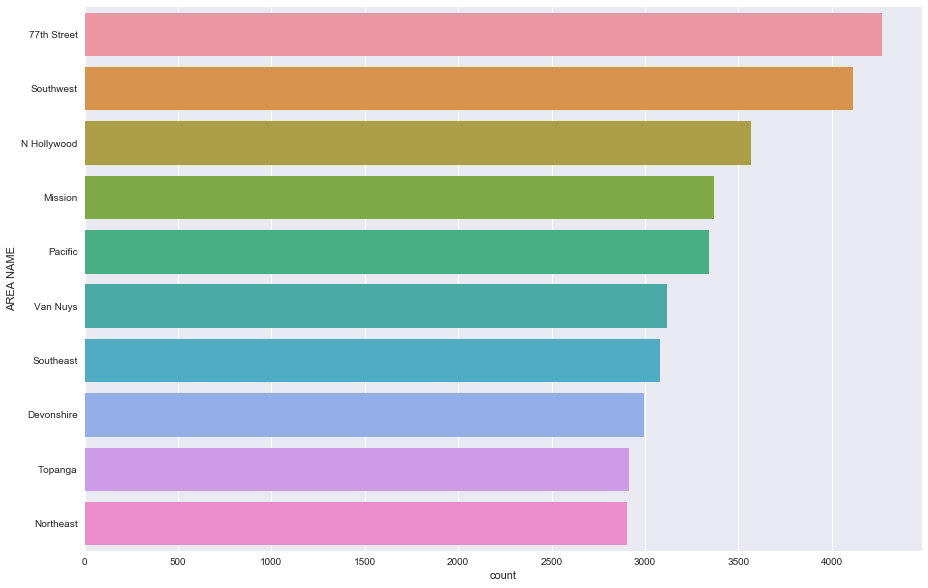

In [47]:
plt.figure(figsize = (15, 10))
sb.countplot(y= 'AREA NAME', data = la, order = la['AREA NAME'].value_counts().iloc[:10].index)

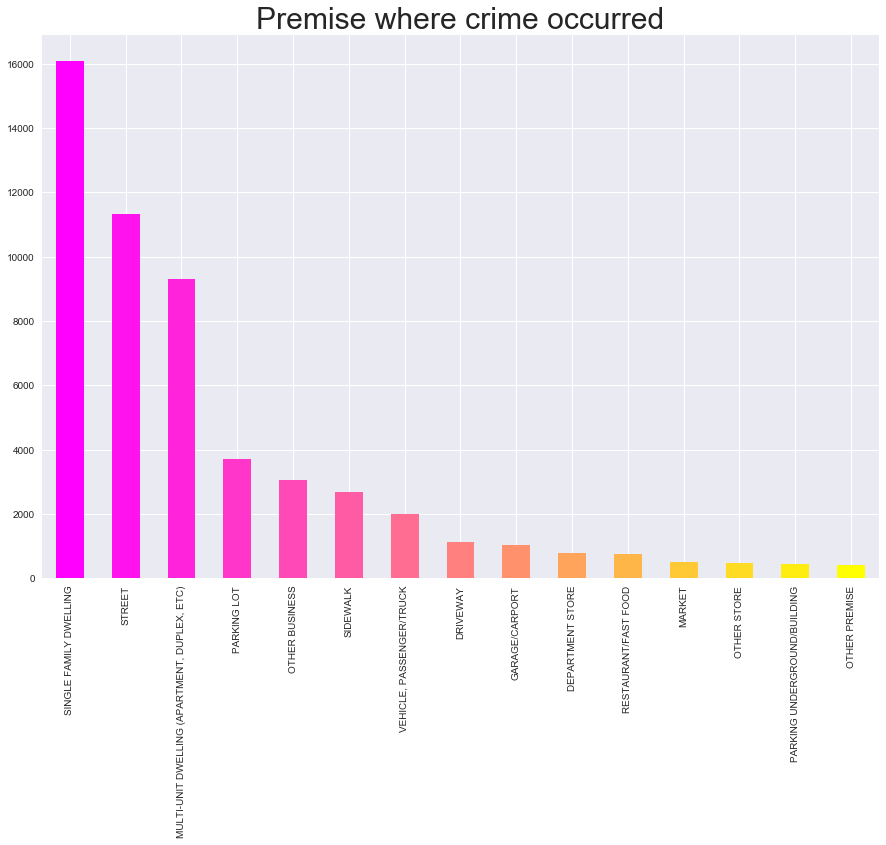

In [48]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

color = plt.cm.spring(np.linspace(0, 1, 15))
la['Premis Desc'].value_counts().iloc[:15].plot.bar(color = color, figsize = (15, 10))

plt.title('Premise where crime occurred',fontsize = 30)

plt.xticks(rotation = 90)
plt.show()

In [49]:
la['Weapon Desc'].value_counts().iloc[:15]

ND                                                43062
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    12986
VERBAL THREAT                                      1460
UNKNOWN WEAPON/OTHER WEAPON                        1427
HAND GUN                                            813
KNIFE WITH BLADE 6INCHES OR LESS                    340
SEMI-AUTOMATIC PISTOL                               300
OTHER KNIFE                                         218
VEHICLE                                             178
UNKNOWN FIREARM                                     169
STICK                                               124
FOLDING KNIFE                                       124
CLUB/BAT                                            121
KITCHEN KNIFE                                       121
REVOLVER                                            120
Name: Weapon Desc, dtype: int64

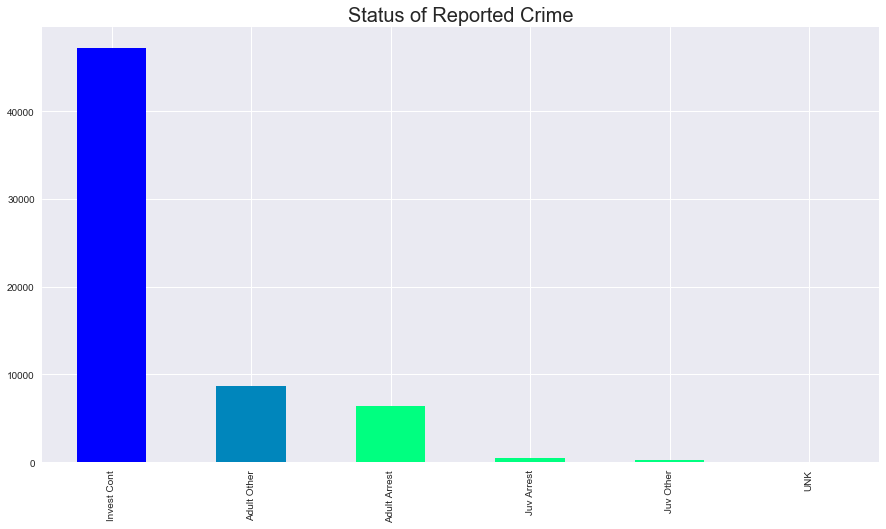

In [50]:
plt.style.use('seaborn')

color = plt.cm.winter(np.linspace(0, 10, 20))
la['Status Desc'].value_counts().plot.bar(color = color, figsize = (15, 8))

plt.title('Status of Reported Crime',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

Based on the chart above it shows that there is a number of continuing investigations.

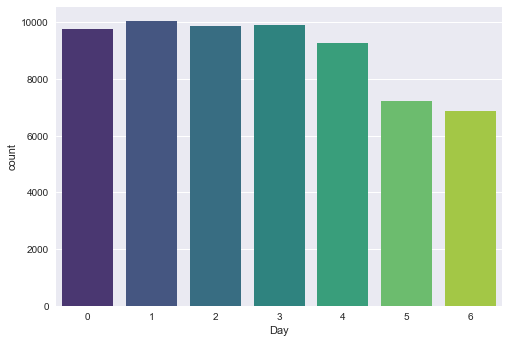

In [51]:
sb.countplot(x='Day',data=la, palette='viridis')

Crimes appears to be high on Sunday through Wednesday.

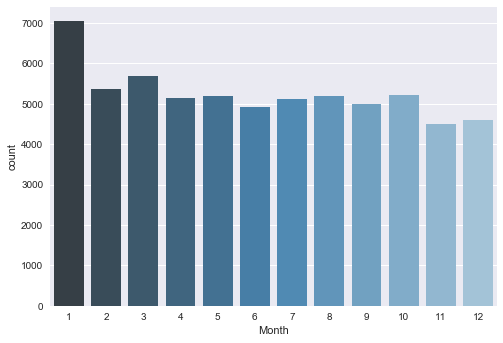

In [52]:
sb.countplot(x='Month',data=la, palette='Blues_d')

January has the highest crime.

## In summary

Based on my results Los Angeles has been doing better from the years 2015 to the present. According to the line graph there has been a massive decline in crime. However, many of the crimes in Los Angeles is not been resolved and theft occurs frequently in Los Angeles. So areas like residential locations need to be monitored frequently often or will be needing more security to prevent in-home theft.   